## 0. Install and Import Dependencies

In [ ]:
!pip install easyocr
!pip install imutils

In [1]:
#pip install opencv-python==4.5.5.64

In [2]:
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [3]:
#!pip install torch==1.10.1+cu102 torchvision==0.11.2+cu102 torchaudio===0.10.1+cu102 -f

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

C:\Users\Christopher Ogbeide\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Christopher Ogbeide\AppData\Local\Programs\Python\Python310\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## 1. Read in Image, Grayscale and Blur

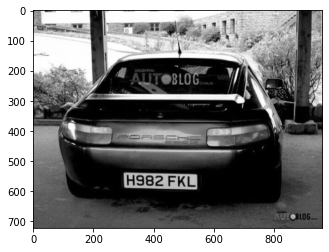

In [5]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

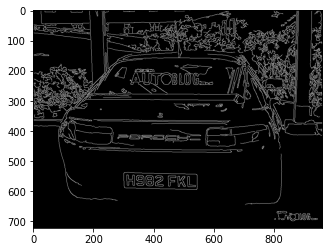

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [9]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

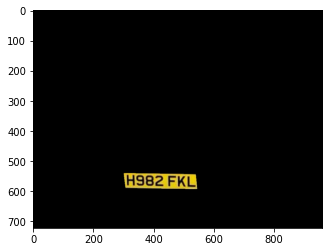

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [12]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

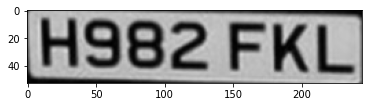

In [26]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [27]:
cropped_image

array([[ 71, 114, 147, ...,   6,   5,   4],
       [ 92, 141, 171, ...,   7,   7,   6],
       [105, 156, 185, ...,  13,   7,   3],
       ...,
       [ 10,   8,   7, ..., 199, 173, 126],
       [  8,   9,   7, ..., 202, 167, 115],
       [  4,   4,   5, ..., 170, 127,  90]], dtype=uint8)

In [21]:
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'‪C:\Program Files\Tesseract-OCR\tesseract.exe'

from PIL import Image

#img = Image.open('cropped_image')
img = read.readtext('cropped_image')
#text = tess.image_to_string(img)

#print(text)


NameError: name 'read' is not defined

In [25]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'‪C:\Program Files\Tesseract-OCR\tesseract.exe'

print(pytesseract.image_to_string('cropped_image'))

TesseractNotFoundError: ‪C:\Program Files\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

## 4. Use Easy OCR To Read Text

In [15]:
import easyocr

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## 5. Render Result

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

NameError: name 'result' is not defined